# Hesitant Share scatterplot
## In this notebook:
* We do a scatterplot of vaccine-hesitancy-share for the 60 topics per time window that we found through NMF optimization (20 general topics, 20 vaccine hesitant topics and 20 vaccine supporters topics).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing dataframes

In [ ]:
g0 = pd.read_csv('/../data/general_i.csv').drop(['Unnamed: 0'],axis=1)
a0 = pd.read_csv('/../data/hesitant_i.csv').drop(['Unnamed: 0'],axis=1)
p0 = pd.read_csv('/../data/supporters_i.csv').drop(['Unnamed: 0'],axis=1)

g1 = pd.read_csv('/../data/general_ii.csv').drop(['Unnamed: 0'],axis=1)
a1 = pd.read_csv('/../data/hesitant_ii.csv').drop(['Unnamed: 0'],axis=1)
p1 = pd.read_csv('/../data/supporters_ii.csv').drop(['Unnamed: 0'],axis=1)

g2 = pd.read_csv('/../data/general_iii.csv').drop(['Unnamed: 0'],axis=1)
a2 = pd.read_csv('/../data/hesitant_iii.csv').drop(['Unnamed: 0'],axis=1)
p2 = pd.read_csv('/../data/supporters_iii.csv').drop(['Unnamed: 0'],axis=1)

g3 = pd.read_csv('/../data/general_iv.csv').drop(['Unnamed: 0'],axis=1)
a3 = pd.read_csv('/../data/hesitant_iv.csv').drop(['Unnamed: 0'],axis=1)
p3 = pd.read_csv('/../data/supporters_iv.csv').drop(['Unnamed: 0'],axis=1)

g4 = pd.read_csv('/../data/general_v.csv').drop(['Unnamed: 0'],axis=1)
a4 = pd.read_csv('/../data/hesitant_v.csv').drop(['Unnamed: 0'],axis=1)
p4 = pd.read_csv('/../data/supporters_v.csv').drop(['Unnamed: 0'],axis=1)

g5 = pd.read_csv('/../data/general_vi.csv').drop(['Unnamed: 0'],axis=1)
a5 = pd.read_csv('/../data/hesitant_vi.csv').drop(['Unnamed: 0'],axis=1)
p5 = pd.read_csv('/../data/supporters_vi.csv').drop(['Unnamed: 0'],axis=1)


g0.head()

In [3]:
g0['group'] = 0
g1['group'] = 0
g2['group'] = 0
g3['group'] = 0
g4['group'] = 0
g5['group'] = 0

a0['group'] = 1
a1['group'] = 1
a2['group'] = 1
a3['group'] = 1
a4['group'] = 1
a5['group'] = 1

p0['group'] = 2
p1['group'] = 2
p2['group'] = 2
p3['group'] = 2
p4['group'] = 2
p5['group'] = 2

In [4]:
g0['Time Window'] = 0
a0['Time Window'] = 0
p0['Time Window'] = 0

g1['Time Window'] = 1
a1['Time Window'] = 1
p1['Time Window'] = 1

g2['Time Window'] = 2
a2['Time Window'] = 2
p2['Time Window'] = 2

g3['Time Window'] = 3
a3['Time Window'] = 3
p3['Time Window'] = 3

g4['Time Window'] = 4
a4['Time Window'] = 4
p4['Time Window'] = 4

g5['Time Window'] = 5
a5['Time Window'] = 5
p5['Time Window'] = 5

In [5]:
g0

,topic_index,topic_words,strength,antivax_s,group,Time Window
0,15,anni influenza bambini stato medici legge due ...,1146.300473,0.546667,0,0
1,1,info trova kg mesi maschio affida chip adozion...,625.584439,0.570058,0,0
2,2,chip_gratuiti abruzzo tel nord canile giorni n...,608.429217,0.555218,0,0
3,9,castrato sano socievole francesca microchip pr...,545.022319,0.596148,0,0
4,0,figlie ucciderli disagio scema spieghiamo inca...,513.940719,0.303325,0,0
5,6,sciopero fame decenni male studi creare figli ...,417.784308,0.428866,0,0
6,4,roma fine coccole macchia gioca maschi_femmine...,405.011693,0.483952,0,0
7,3,morbillo congo epidemia casi morti robertoburi...,390.728547,0.308214,0,0
8,12,pd obbligo gt mes tav governo tap stopmes appr...,376.375199,0.745382,0,0
9,14,cucciolo mesi volevano volontari mario vecchio...,370.597290,0.726788,0,0


In [6]:
def norm(g):
    g['strength'] = g.strength / g.strength.sum()
    return g

In [7]:
df = pd.concat([norm(g0),norm(a0),norm(p0),
                norm(g1),norm(a1),norm(p1),
                norm(g2),norm(a2),norm(p2),
                norm(g3),norm(a3),norm(p3),
                norm(g4),norm(a4),norm(p4),
                norm(g5),norm(a5),norm(p5)]).reset_index(drop=True)
df

,topic_index,topic_words,strength,antivax_s,group,Time Window
0,15,anni influenza bambini stato medici legge due ...,0.140265,0.546667,0,0
1,1,info trova kg mesi maschio affida chip adozion...,0.076548,0.570058,0,0
2,2,chip_gratuiti abruzzo tel nord canile giorni n...,0.074449,0.555218,0,0
3,9,castrato sano socievole francesca microchip pr...,0.066691,0.596148,0,0
4,0,figlie ucciderli disagio scema spieghiamo inca...,0.062887,0.303325,0,0
...,...,...,...,...,...,...
355,4,tampone gratis paghi dilapidare egoismo_ignora...,0.031411,0.363088,2,5
356,2,libertà vita_altrui licenza richiesta pericolo...,0.031071,0.400752,2,5
357,6,dovrebbero insegnanti sindacati_difendono form...,0.027439,0.357854,2,5
358,18,salvini varianti_nascono reazione informazione...,0.026665,0.329740,2,5


In [8]:
df['tw_g'] = df['Time Window'] + (df['group']*0.2 - 0.2)

In [9]:
df['tw_g']

0     -0.2
1     -0.2
2     -0.2
3     -0.2
4     -0.2
      ... 
355    5.2
356    5.2
357    5.2
358    5.2
359    5.2
Name: tw_g, Length: 360, dtype: float64

In [10]:
a0['antivax_s'].argmax()

12

In [11]:
topic = df[(df.group==1)&(df['Time Window']==0)]
topic.iloc[topic['antivax_s'].argmax()]

topic_index                                                    3
topic_words    bimbo giorno_prima muore lastragesilenziosa as...
strength                                                0.042189
antivax_s                                                0.78509
group                                                          1
Time Window                                                    0
tw_g                                                         0.0
Name: 32, dtype: object

In [12]:
topic

,topic_index,topic_words,strength,antivax_s,group,Time Window,tw_g
20,5,obbligo germania domande morbillo intelligenti...,0.072551,0.566894,1,0,0.0
21,15,morte culla sids ore improvvisa caso bambino e...,0.072337,0.642063,1,0,0.0
22,11,antinfluenzale anni polmonite problemi amica c...,0.069070,0.584605,1,0,0.0
23,4,morti danneggiati gravi esistono morbillo dann...,0.064036,0.528913,1,0,0.0
24,12,medici scettici cancro scoperto assassinati tr...,0.060252,0.598090,1,0,0.0
25,8,novembre salute ministero condannato colpa inf...,0.058829,0.468500,1,0,0.0
26,17,salvano sardine risorse ue politico pace leade...,0.058758,0.619490,1,0,0.0
27,6,legge obbligatori voleva salvini vedere devono...,0.057705,0.619389,1,0,0.0
28,16,pd gt obbligo mes tav governo tap stopmes appr...,0.056646,0.762209,1,0,0.0
29,1,bambini milioni immunodepressi prima causa cal...,0.056140,0.552692,1,0,0.0


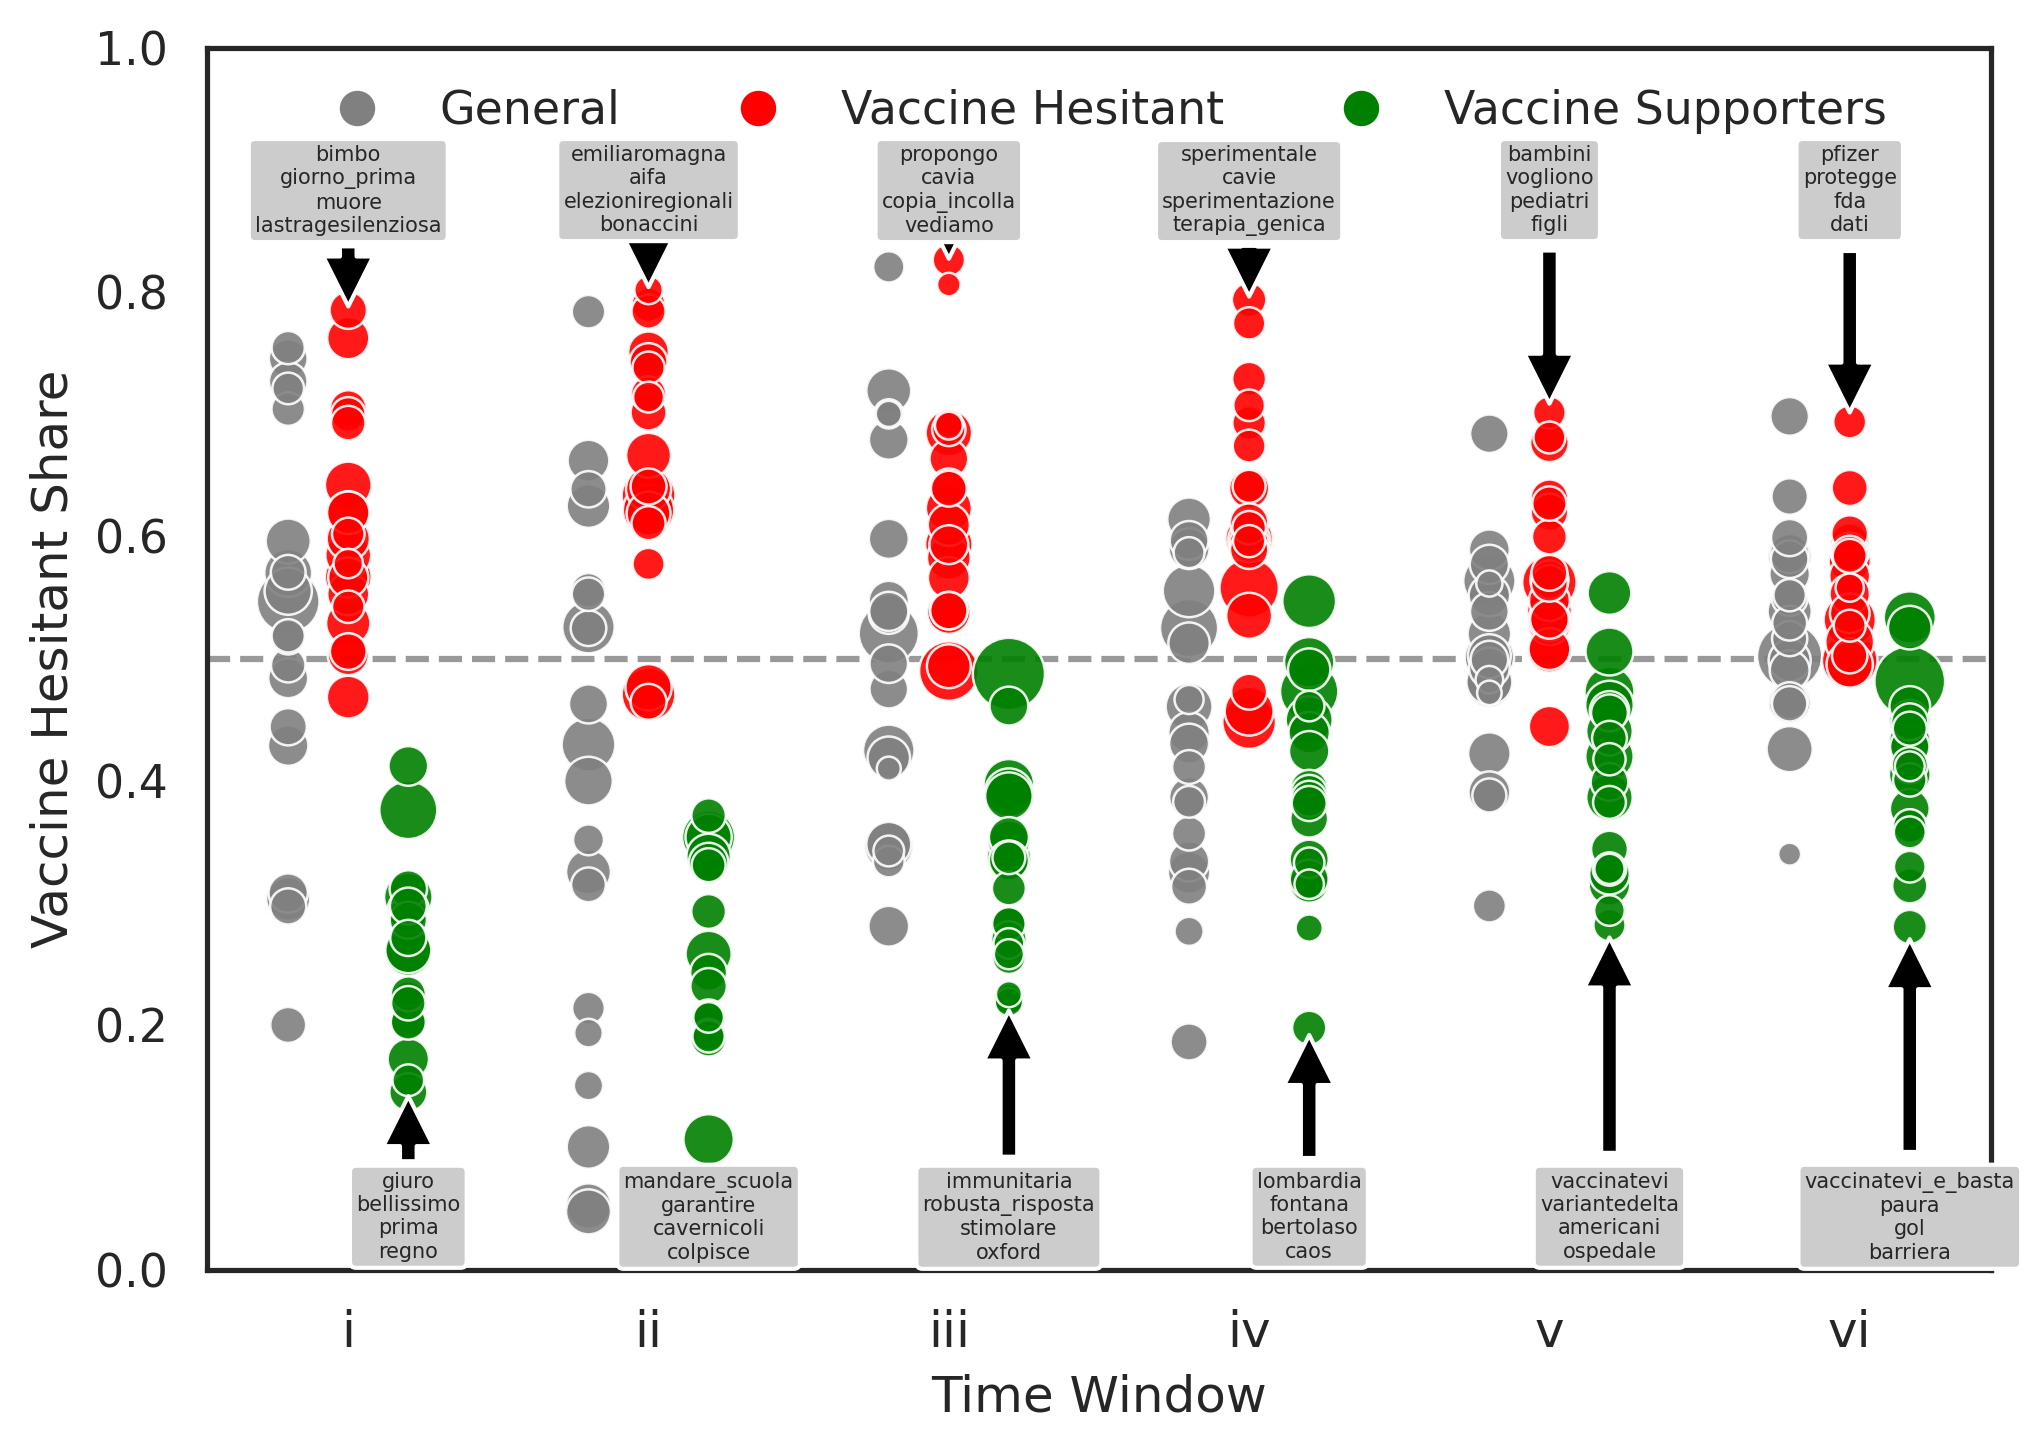

In [13]:
from matplotlib.lines import Line2D
from matplotlib.colors import ListedColormap
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300


sns.set(font_scale=1.2)
sns.set_theme(style='white')
ax, fig = plt.subplots(figsize=(7,5))
sns.set(font_scale=1.2)
sns.set_theme(style='white')

palette = ListedColormap(['grey', 'red', 'green'])
p = sns.scatterplot(data=df, y='antivax_s', x='tw_g', hue='group', palette=palette,
               s=100, alpha=0.9, sizes=(30,300), size='strength', legend=False)


p.set_ylabel('Vaccine Hesitant Share')#,fontsize=15)
p.set_xlabel('Time Window')#,fontsize=15)

plt.xticks(np.arange(6),['i','ii','iii','iv','v','vi'], fontsize=12)
p.axhline(0.5, color='grey', alpha=0.8, linestyle='--', zorder=-1)

plt.ylim(0, 1)



colors = ['grey', 'red', 'green'] 
custom = [Line2D([], [], marker='.', markersize=15, color=colors[0], linestyle='None'),
          Line2D([], [], marker='.', markersize=15, color=colors[1], linestyle='None'),
          Line2D([], [], marker='.', markersize=15, color=colors[2], linestyle='None')]

plt.legend(custom, ['General', 'Vaccine Hesitant', 'Vaccine Supporters'], ncol=3, loc='upper center', frameon=False)


for interval in range(6):
    topic = df[(df.group==1)&(df['Time Window']==interval)]
    topic = topic.iloc[topic['antivax_s'].argmax()]
    plt.gca().annotate("\n".join(topic.topic_words.split(' ')[:4]),
            xy=(interval, topic.antivax_s),
            xytext=(interval, 0.92), #textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='center', verticalalignment='top', fontsize=5,
            bbox=dict(boxstyle="round", fc="0.8"),)
    
for interval in range(6):
    topic = df[(df.group==2)&(df['Time Window']==interval)]
    topic = topic.iloc[topic['antivax_s'].argmin()]
    plt.gca().annotate("\n".join(topic.topic_words.split(' ')[:4]),
            xy=(interval+0.2, topic.antivax_s),
            xytext=(interval+0.2, 0.08), #textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='center', verticalalignment='top', fontsize=5,
            bbox=dict(boxstyle="round", fc="0.8"),)

plt.tight_layout()
#plt.savefig('/../figures/topic_plot_bars_final.pdf')